# MNIST classification

In [ ]:
#importing packages
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

## Loading the MNIST dataset

In [ ]:
import tensorflow_datasets as tfds
( train_ds , test_ds ) , ds_info = tfds . load ('mnist', split =[ 'train', 'test'], as_supervised = True , with_info = True )

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
print(ds_info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/3.0.1.incompleteHPHC23',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",

### Investigating test dataset

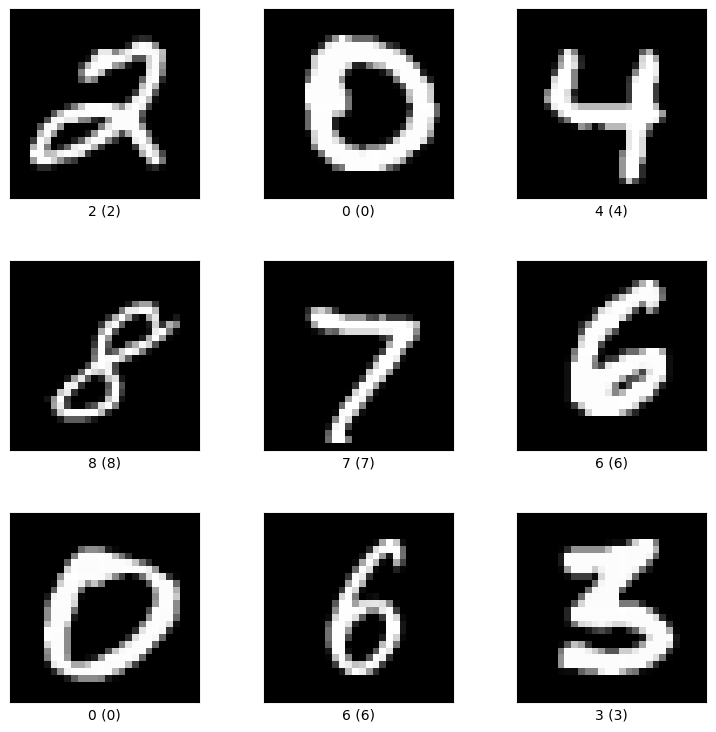

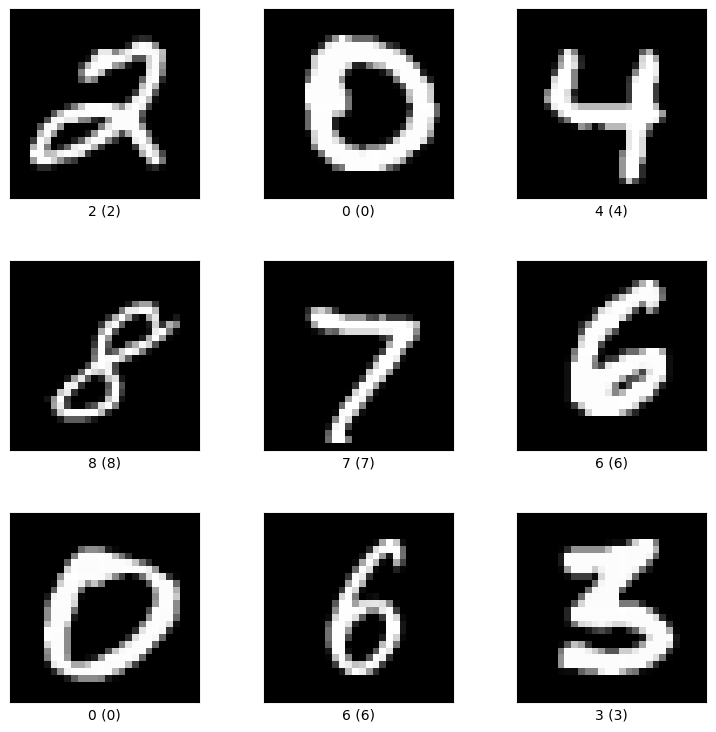

In [ ]:
tfds.show_examples(test_ds, ds_info)

Answer the following:
* **How many training/test images are there?**
> train: 60 000 ; test: 10 000

* **What's the image shape?**
> 28,28,1

* **What range are pixel values in?**
>256

## Creating a data pipeline

In [ ]:
def normalize_img(image, label):
  """cast uint8 to float32
     normalize to normal distribution
  """
  return tf.cast(image, tf.float32) / 128. - 1, label

train_ds = train_ds.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.cache()
train_ds = train_ds.shuffle(ds_info.splits['train'].num_examples)
train_ds = train_ds.batch(128)
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)

test_ds = test_ds.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.batch(128)
test_ds = test_ds.cache()
test_ds = test_ds.prefetch(tf.data.AUTOTUNE)

## Build and train the model

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.1),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds,
)

Epoch 1/10
469/469 [==============================] - 16s 13ms/step - loss: 0.4259 - sparse_categorical_accuracy: 0.8674 - val_loss: 0.1952 - val_sparse_categorical_accuracy: 0.9413
Epoch 2/10
469/469 [==============================] - 4s 7ms/step - loss: 0.1657 - sparse_categorical_accuracy: 0.9495 - val_loss: 0.1297 - val_sparse_categorical_accuracy: 0.9602
Epoch 3/10
469/469 [==============================] - 4s 7ms/step - loss: 0.1213 - sparse_categorical_accuracy: 0.9637 - val_loss: 0.1153 - val_sparse_categorical_accuracy: 0.9639
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0979 - sparse_categorical_accuracy: 0.9707 - val_loss: 0.1076 - val_sparse_categorical_accuracy: 0.9661
Epoch 5/10
469/469 [==============================] - 4s 7ms/step - loss: 0.0812 - sparse_categorical_accuracy: 0.9745 - val_loss: 0.1050 - val_sparse_categorical_accuracy: 0.9657
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0681 - sparse_catego

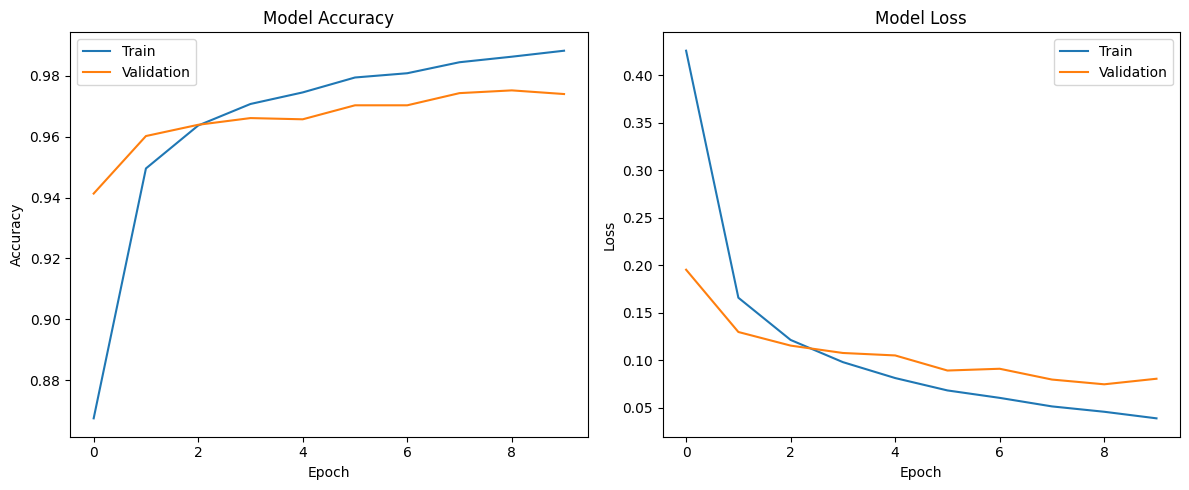

In [ ]:
# Create a figure with two subplots side by side
plt.figure(figsize=(12, 5))

# Plot train vs validation accuracy in the first subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot train vs validation loss in the second subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots
plt.show()

### Trying different variations of the network

In [ ]:
#variation 1: trying a smaller learning rate --> lower accuracy and higher loss
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds,
)

Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 0.6853 - sparse_categorical_accuracy: 0.8111 - val_loss: 0.3709 - val_sparse_categorical_accuracy: 0.8994
Epoch 2/10
469/469 [==============================] - 4s 7ms/step - loss: 0.3490 - sparse_categorical_accuracy: 0.8998 - val_loss: 0.3072 - val_sparse_categorical_accuracy: 0.9141
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2997 - sparse_categorical_accuracy: 0.9132 - val_loss: 0.2760 - val_sparse_categorical_accuracy: 0.9188
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2702 - sparse_categorical_accuracy: 0.9223 - val_loss: 0.2504 - val_sparse_categorical_accuracy: 0.9280
Epoch 5/10
469/469 [==============================] - 4s 7ms/step - loss: 0.2489 - sparse_categorical_accuracy: 0.9290 - val_loss: 0.2337 - val_sparse_categorical_accuracy: 0.9321
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2305 - sparse_categorica

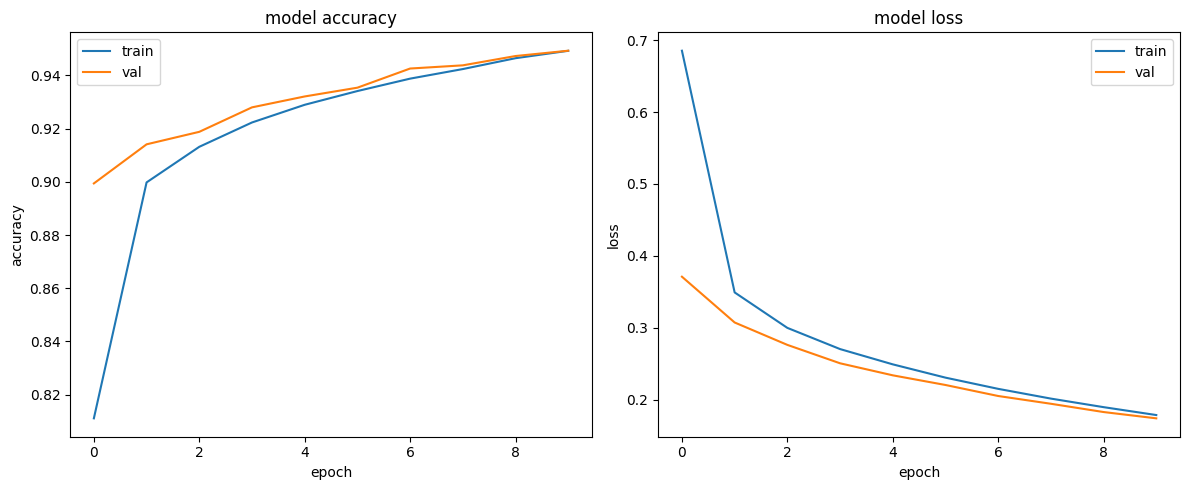

In [ ]:
# Create a figure with two subplots side by side
plt.figure(figsize=(12, 5))

# Plot train vs validation accuracy in the first subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# Plot train vs validation accuracy in the second subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
#variation 2: trying a smaller number of epochs --> about the same accuracy but higher loss
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.1),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    train_ds,
    epochs=5,
    validation_data=test_ds,
)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.4321 - sparse_categorical_accuracy: 0.8649 - val_loss: 0.2530 - val_sparse_categorical_accuracy: 0.9182
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1651 - sparse_categorical_accuracy: 0.9493 - val_loss: 0.1554 - val_sparse_categorical_accuracy: 0.9511
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1201 - sparse_categorical_accuracy: 0.9636 - val_loss: 0.1254 - val_sparse_categorical_accuracy: 0.9596
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0973 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.0942 - val_sparse_categorical_accuracy: 0.9705
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0792 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.1507 - val_sparse_categorical_accuracy: 0.9520


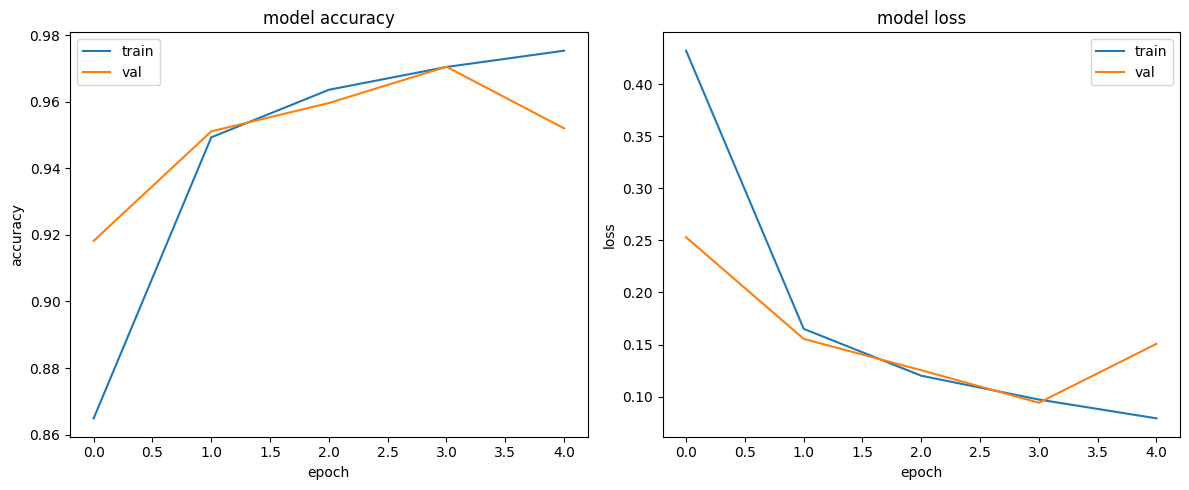

In [ ]:
# Create a figure with two subplots side by side
plt.figure(figsize=(12, 5))

# Plot train vs validation accuracy in the first subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# Plot train vs validation loss in the second subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
#variation 3: trying a different optimizer --> only small differences in loss and accuracy but adam does slightly better
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds,
)

Epoch 1/10
469/469 [==============================] - 13s 11ms/step - loss: 0.3020 - sparse_categorical_accuracy: 0.9073 - val_loss: 0.1525 - val_sparse_categorical_accuracy: 0.9519
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1347 - sparse_categorical_accuracy: 0.9588 - val_loss: 0.1240 - val_sparse_categorical_accuracy: 0.9621
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0999 - sparse_categorical_accuracy: 0.9689 - val_loss: 0.1032 - val_sparse_categorical_accuracy: 0.9677
Epoch 4/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0809 - sparse_categorical_accuracy: 0.9742 - val_loss: 0.0874 - val_sparse_categorical_accuracy: 0.9711
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0659 - sparse_categorical_accuracy: 0.9788 - val_loss: 0.0902 - val_sparse_categorical_accuracy: 0.9717
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0584 - sparse_categ

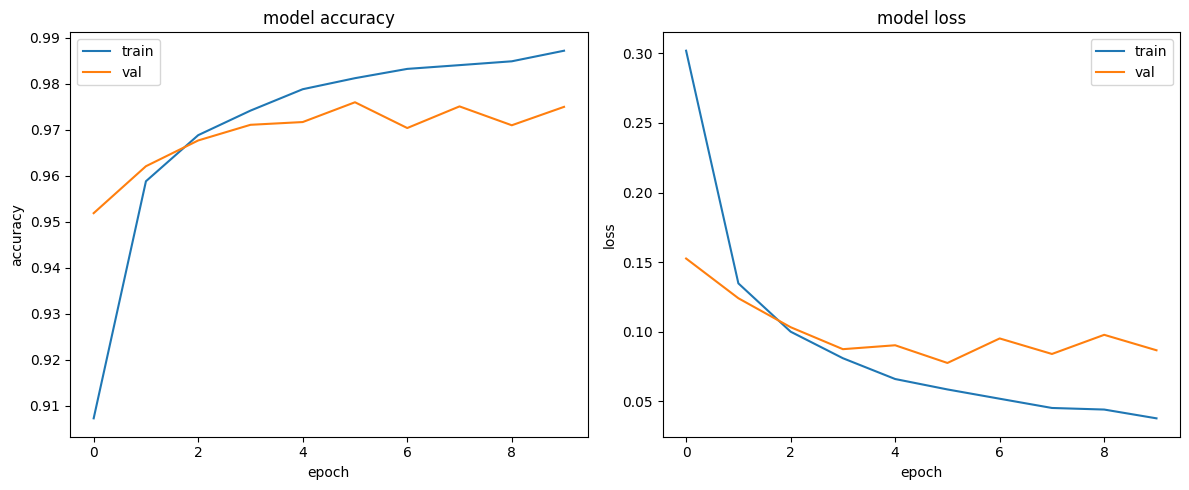

In [ ]:
# Create a figure with two subplots side by side
plt.figure(figsize=(12, 5))

# Plot train vs validation accuracy in the first subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# Plot train vs validation loss in the second subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
#variation 4: trying a smaller network --> about the same accuracy but higher loss
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.1),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds,
)

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.5114 - sparse_categorical_accuracy: 0.8424 - val_loss: 0.2752 - val_sparse_categorical_accuracy: 0.9173
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2329 - sparse_categorical_accuracy: 0.9311 - val_loss: 0.2045 - val_sparse_categorical_accuracy: 0.9392
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1777 - sparse_categorical_accuracy: 0.9470 - val_loss: 0.1486 - val_sparse_categorical_accuracy: 0.9563
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1465 - sparse_categorical_accuracy: 0.9567 - val_loss: 0.1413 - val_sparse_categorical_accuracy: 0.9567
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1264 - sparse_categorical_accuracy: 0.9624 - val_loss: 0.1253 - val_sparse_categorical_accuracy: 0.9618
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1118 - sparse_categorica

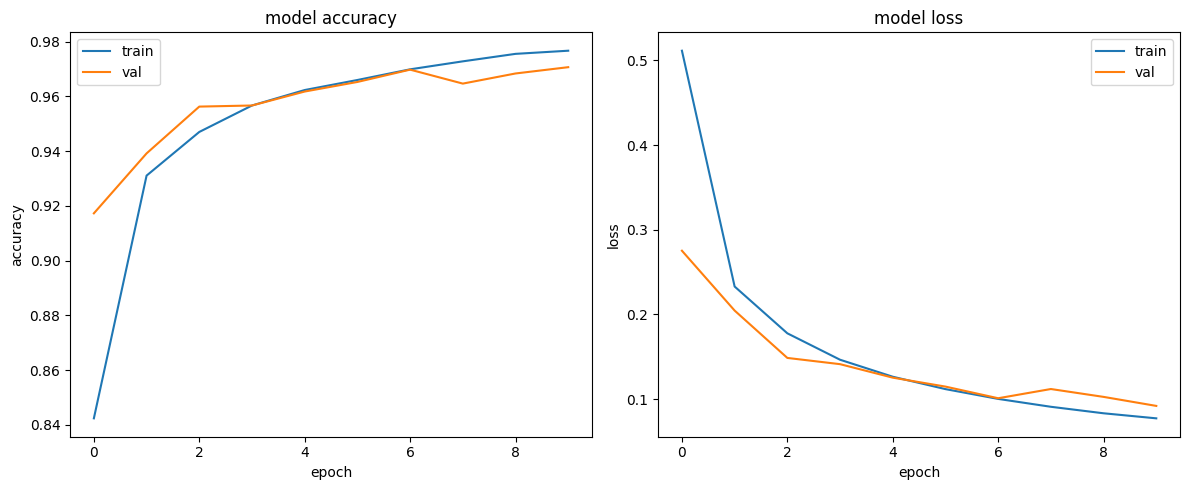

In [ ]:
# Create a figure with two subplots side by side
plt.figure(figsize=(12, 5))

# Plot train vs validation accuracy in the first subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# Plot train vs validation loss in the second subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots
plt.show()

#Summary
''#layers #optimizer  #learning_rate #epoch''

#original and best results
256 256, SGD, 0.1, 10

loss: 0.4342 - sparse_categorical_accuracy: 0.8632 - val_loss: 0.1831 - val_sparse_categorical_accuracy: 0.9443

loss: 0.0399 - sparse_categorical_accuracy: 0.9880 - val_loss: 0.0759 - val_sparse_categorical_accuracy: 0.9765

#1st version
256 256, SGD, 0.01, 10

loss: 0.6942 - sparse_categorical_accuracy: 0.8111 - val_loss: 0.3766 - val_sparse_categorical_accuracy: 0.8950

loss: 0.1811 - sparse_categorical_accuracy: 0.9483 - val_loss: 0.1743 - val_sparse_categorical_accuracy: 0.9492 <br>
<br>
smaller learning rate --> lower accuracy and higher loss  <br>
Interpretation: smaller step in adjusting the weights in regards to the gradient therefore the decrease of the loss is slower and the accuracy is increaing slower

#2nd version
256 256, SGD, 0.1, 5

loss: 0.4247 - sparse_categorical_accuracy: 0.8662 - val_loss: 0.1989 - val_sparse_categorical_accuracy: 0.9382

loss: 0.0816 - sparse_categorical_accuracy: 0.9746 - val_loss: 0.0940 - val_sparse_categorical_accuracy: 0.9702 <br>
<br>
smaller number of epochs --> about the same accuracy but higher loss <br>
If we caompare this to the inital settings on Epoch 5 we do not see significant differences in accuracy and loss. But ofc with a higher number of epochs we get better results in the end

#3rd version
256 256, Adam, default, 10

loss: 0.3020 - sparse_categorical_accuracy: 0.9073 - val_loss: 0.1525 - val_sparse_categorical_accuracy: 0.9519

loss: 0.0376 - sparse_categorical_accuracy: 0.9872 - val_loss: 0.0866 - val_sparse_categorical_accuracy: 0.9750 <br>
<br>
different optimizer (adam) --> only small differences in loss and accuracy but adam does slightly better <br>
As the adam optimizer includes previos gradients the adaptation of the weights is slightly better

#4th version
128, SGD, 0.1, 10

loss: 0.5114 - sparse_categorical_accuracy: 0.8424 - val_loss: 0.2752 - val_sparse_categorical_accuracy: 0.9173

loss: 0.0773 - sparse_categorical_accuracy: 0.9767 - val_loss: 0.0920 - val_sparse_categorical_accuracy: 0.9707 <br>
<br>
trying a smaller network --> about the same accuracy but higher loss <br>
As the results are comparable the questions arises if the lower computations cost is worth the slightly worse results
